In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [2]:
test= pd.read_csv("./Data For Project/test_data.csv")
test

Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0            51             1                 0.0032                -0.0003   
1            51             2                -0.0011                -0.0002   
2            51             3                 0.0008                -0.0004   
3            51             4                -0.0010                -0.0000   
4            51             5                 0.0024                 0.0003   
...         ...           ...                    ...                    ...   
6407        100           116                 0.0006                 0.0000   
6408        100           117                 0.0006                -0.0001   
6409        100           118                 0.0018                -0.0002   
6410        100           119                 0.0020                -0.0003   
6411        100           120                 0.0004                 0.0003   

      Operation Condition 3      T2     T24      T30      T50     P2  ...  \
0                     100.0  518.67  641.83  1583.55  1408.68  14.62  ...   
1                     100.0  518.67  642.09  1580.84  1397.69  14.62  ...   
2                     100.0  518.67  642.49  1591.56  1398.40  14.62  ...   
3                     100.0  518.67  642.42  1573.22  1397.74  14.62  ...   
4                     100.0  518.67  642.08  1587.52  1388.02  14.62  ...   
...                     ...     ...     ...      ...      ...    ...  ...   
6407                  100.0  518.67  642.36  1591.22  1407.75  14.62  ...   
6408                  100.0  518.67  642.77  1590.85  1412.00  14.62  ...   
6409                  100.0  518.67  642.21  1586.56  1405.31  14.62  ...   
6410                  100.0  518.67  642.57  1588.46  1405.24  14.62  ...   
6411                  100.0  518.67  642.66  1588.09  1407.57  14.62  ...   

         phi      NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd  \
0     521.79  2387.99  8149.56  8.3884  0.03      391    2388      100.0   
1     522.13  2387.98  8145.73  8.3922  0.03      391    2388      100.0   
2     522.27  2388.00  8142.38  8.4018  0.03      392    2388      100.0   
3     522.71  2387.99  8148.23  8.3900  0.03      393    2388      100.0   
4     522.14  2388.02  8147.25  8.4024  0.03      391    2388      100.0   
...      ...      ...      ...     ...   ...      ...     ...        ...   
6407  521.41  2388.07  8145.15  8.4126  0.03      392    2388      100.0   
6408  521.74  2388.13  8143.03  8.4345  0.03      394    2388      100.0   
6409  521.33  2388.09  8139.82  8.4590  0.03      393    2388      100.0   
6410  521.10  2388.07  8146.76  8.4512  0.03      394    2388      100.0   
6411  520.73  2388.07  8145.30  8.4193  0.03      394    2388      100.0   

        W31      W32  
0     39.08  23.3214  
1     38.83  23.3451  
2     39.18  23.3495  
3     38.89  23.4847  
4     39.05  23.4072  
...     ...      ...  
6407  39.05  23.3016  
6408  38.79  23.3007  
6409  38.81  23.2483  
6410  38.77  23.2437  
6411  38.78  23.3422  

[6412 rows x 26 columns]

In [3]:
test['Remaining_cycles'] = test.groupby('Engine id')['Cycle number'].transform("max") - test['Cycle number']
test.head()

Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0         51             1                 0.0032                -0.0003   
1         51             2                -0.0011                -0.0002   
2         51             3                 0.0008                -0.0004   
3         51             4                -0.0010                -0.0000   
4         51             5                 0.0024                 0.0003   

   Operation Condition 3      T2     T24      T30      T50     P2  ...  \
0                  100.0  518.67  641.83  1583.55  1408.68  14.62  ...   
1                  100.0  518.67  642.09  1580.84  1397.69  14.62  ...   
2                  100.0  518.67  642.49  1591.56  1398.40  14.62  ...   
3                  100.0  518.67  642.42  1573.22  1397.74  14.62  ...   
4                  100.0  518.67  642.08  1587.52  1388.02  14.62  ...   

       NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  \
0  2387.99  8149.56  8.3884  0.03      391    2388      100.0  39.08  23.3214   
1  2387.98  8145.73  8.3922  0.03      391    2388      100.0  38.83  23.3451   
2  2388.00  8142.38  8.4018  0.03      392    2388      100.0  39.18  23.3495   
3  2387.99  8148.23  8.3900  0.03      393    2388      100.0  38.89  23.4847   
4  2388.02  8147.25  8.4024  0.03      391    2388      100.0  39.05  23.4072   

   Remaining_cycles  
0               126  
1               125  
2               124  
3               123  
4               122  

[5 rows x 27 columns]

In [4]:
train = pd.read_csv("./Data For Project/train_data.csv")
train

Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0             1             1                -0.0007                -0.0004   
1             1             2                 0.0019                -0.0003   
2             1             3                -0.0043                 0.0003   
3             1             4                 0.0007                 0.0000   
4             1             5                -0.0019                -0.0002   
...         ...           ...                    ...                    ...   
9904         50           194                 0.0037                 0.0004   
9905         50           195                 0.0019                -0.0004   
9906         50           196                 0.0020                -0.0002   
9907         50           197                -0.0026                -0.0001   
9908         50           198                 0.0039                 0.0001   

      Operation Condition 3      T2     T24      T30      T50     P2  ...  \
0                     100.0  518.67  641.82  1589.70  1400.60  14.62  ...   
1                     100.0  518.67  642.15  1591.82  1403.14  14.62  ...   
2                     100.0  518.67  642.35  1587.99  1404.20  14.62  ...   
3                     100.0  518.67  642.35  1582.79  1401.87  14.62  ...   
4                     100.0  518.67  642.37  1582.85  1406.22  14.62  ...   
...                     ...     ...     ...      ...      ...    ...  ...   
9904                  100.0  518.67  643.77  1604.93  1423.51  14.62  ...   
9905                  100.0  518.67  643.33  1605.31  1434.87  14.62  ...   
9906                  100.0  518.67  643.32  1602.26  1430.01  14.62  ...   
9907                  100.0  518.67  643.73  1599.94  1432.87  14.62  ...   
9908                  100.0  518.67  643.83  1608.20  1433.88  14.62  ...   

         phi      NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd  \
0     521.66  2388.02  8138.62  8.4195  0.03      392    2388      100.0   
1     522.28  2388.07  8131.49  8.4318  0.03      392    2388      100.0   
2     522.42  2388.03  8133.23  8.4178  0.03      390    2388      100.0   
3     522.86  2388.08  8133.83  8.3682  0.03      392    2388      100.0   
4     522.19  2388.04  8133.80  8.4294  0.03      393    2388      100.0   
...      ...      ...      ...     ...   ...      ...     ...        ...   
9904  519.85  2388.19  8194.20  8.5043  0.03      396    2388      100.0   
9905  519.33  2388.21  8200.90  8.5352  0.03      395    2388      100.0   
9906  519.88  2388.17  8194.10  8.5034  0.03      395    2388      100.0   
9907  519.48  2388.20  8194.64  8.5241  0.03      397    2388      100.0   
9908  520.00  2388.25  8200.20  8.5002  0.03      396    2388      100.0   

        W31      W32  
0     39.06  23.4190  
1     39.00  23.4236  
2     38.95  23.3442  
3     38.88  23.3739  
4     38.90  23.4044  
...     ...      ...  
9904  38.42  23.0543  
9905  38.45  23.0191  
9906  38.45  23.0379  
9907  38.52  23.0832  
9908  38.43  23.1086  

[9909 rows x 26 columns]

In [5]:
train['Remaining_cycles'] = train.groupby('Engine id')['Cycle number'].transform("max") - train['Cycle number']

In [6]:
train.head()

Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0          1             1                -0.0007                -0.0004   
1          1             2                 0.0019                -0.0003   
2          1             3                -0.0043                 0.0003   
3          1             4                 0.0007                 0.0000   
4          1             5                -0.0019                -0.0002   

   Operation Condition 3      T2     T24      T30      T50     P2  ...  \
0                  100.0  518.67  641.82  1589.70  1400.60  14.62  ...   
1                  100.0  518.67  642.15  1591.82  1403.14  14.62  ...   
2                  100.0  518.67  642.35  1587.99  1404.20  14.62  ...   
3                  100.0  518.67  642.35  1582.79  1401.87  14.62  ...   
4                  100.0  518.67  642.37  1582.85  1406.22  14.62  ...   

       NRf      NRc     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  \
0  2388.02  8138.62  8.4195  0.03      392    2388      100.0  39.06  23.4190   
1  2388.07  8131.49  8.4318  0.03      392    2388      100.0  39.00  23.4236   
2  2388.03  8133.23  8.4178  0.03      390    2388      100.0  38.95  23.3442   
3  2388.08  8133.83  8.3682  0.03      392    2388      100.0  38.88  23.3739   
4  2388.04  8133.80  8.4294  0.03      393    2388      100.0  38.90  23.4044   

   Remaining_cycles  
0               191  
1               190  
2               189  
3               188  
4               187  

[5 rows x 27 columns]

In [7]:
forecast = pd.read_csv("./Data For Project/RUL_forecast_length.csv")
forecast.head()

Forecast Length  Engine id
0               86         51
1               86         52
2               78         53
3              103         54
4               78         55

In [8]:
train.columns

Index(['Engine id', 'Cycle number', 'Operation Condition 1',
       'Operation Condition 2', 'Operation Condition 3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'Remaining_cycles'],
      dtype='object')

<Axes: >

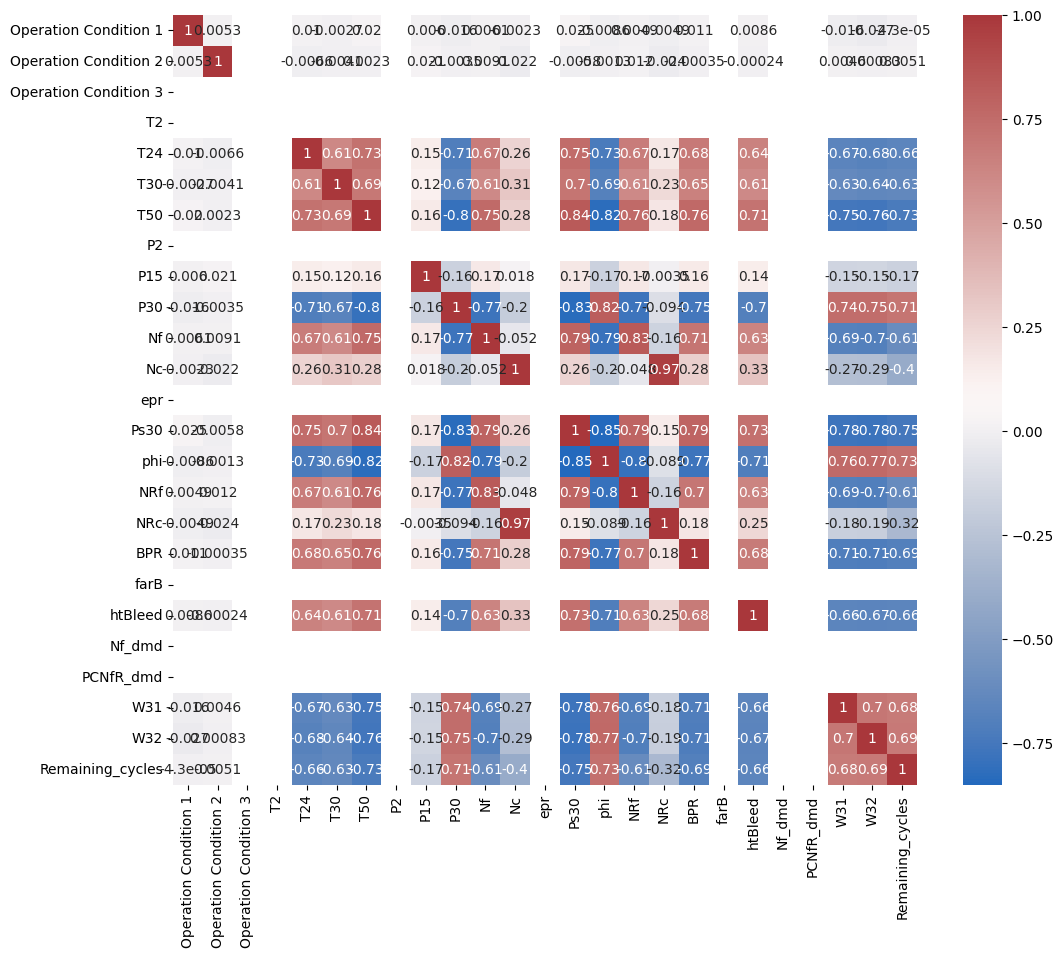

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(train.drop(columns=['Engine id','Cycle number']).corr(), 
            cmap='vlag', 
            annot=True
            )

In [13]:
X_train=train.drop(columns=['Cycle number', 'Engine id', 'Remaining_cycles'])
y_train = train['Remaining_cycles']
X_test=test.drop(columns=['Cycle number', 'Engine id', 'Remaining_cycles'])
y_test = test['Remaining_cycles']

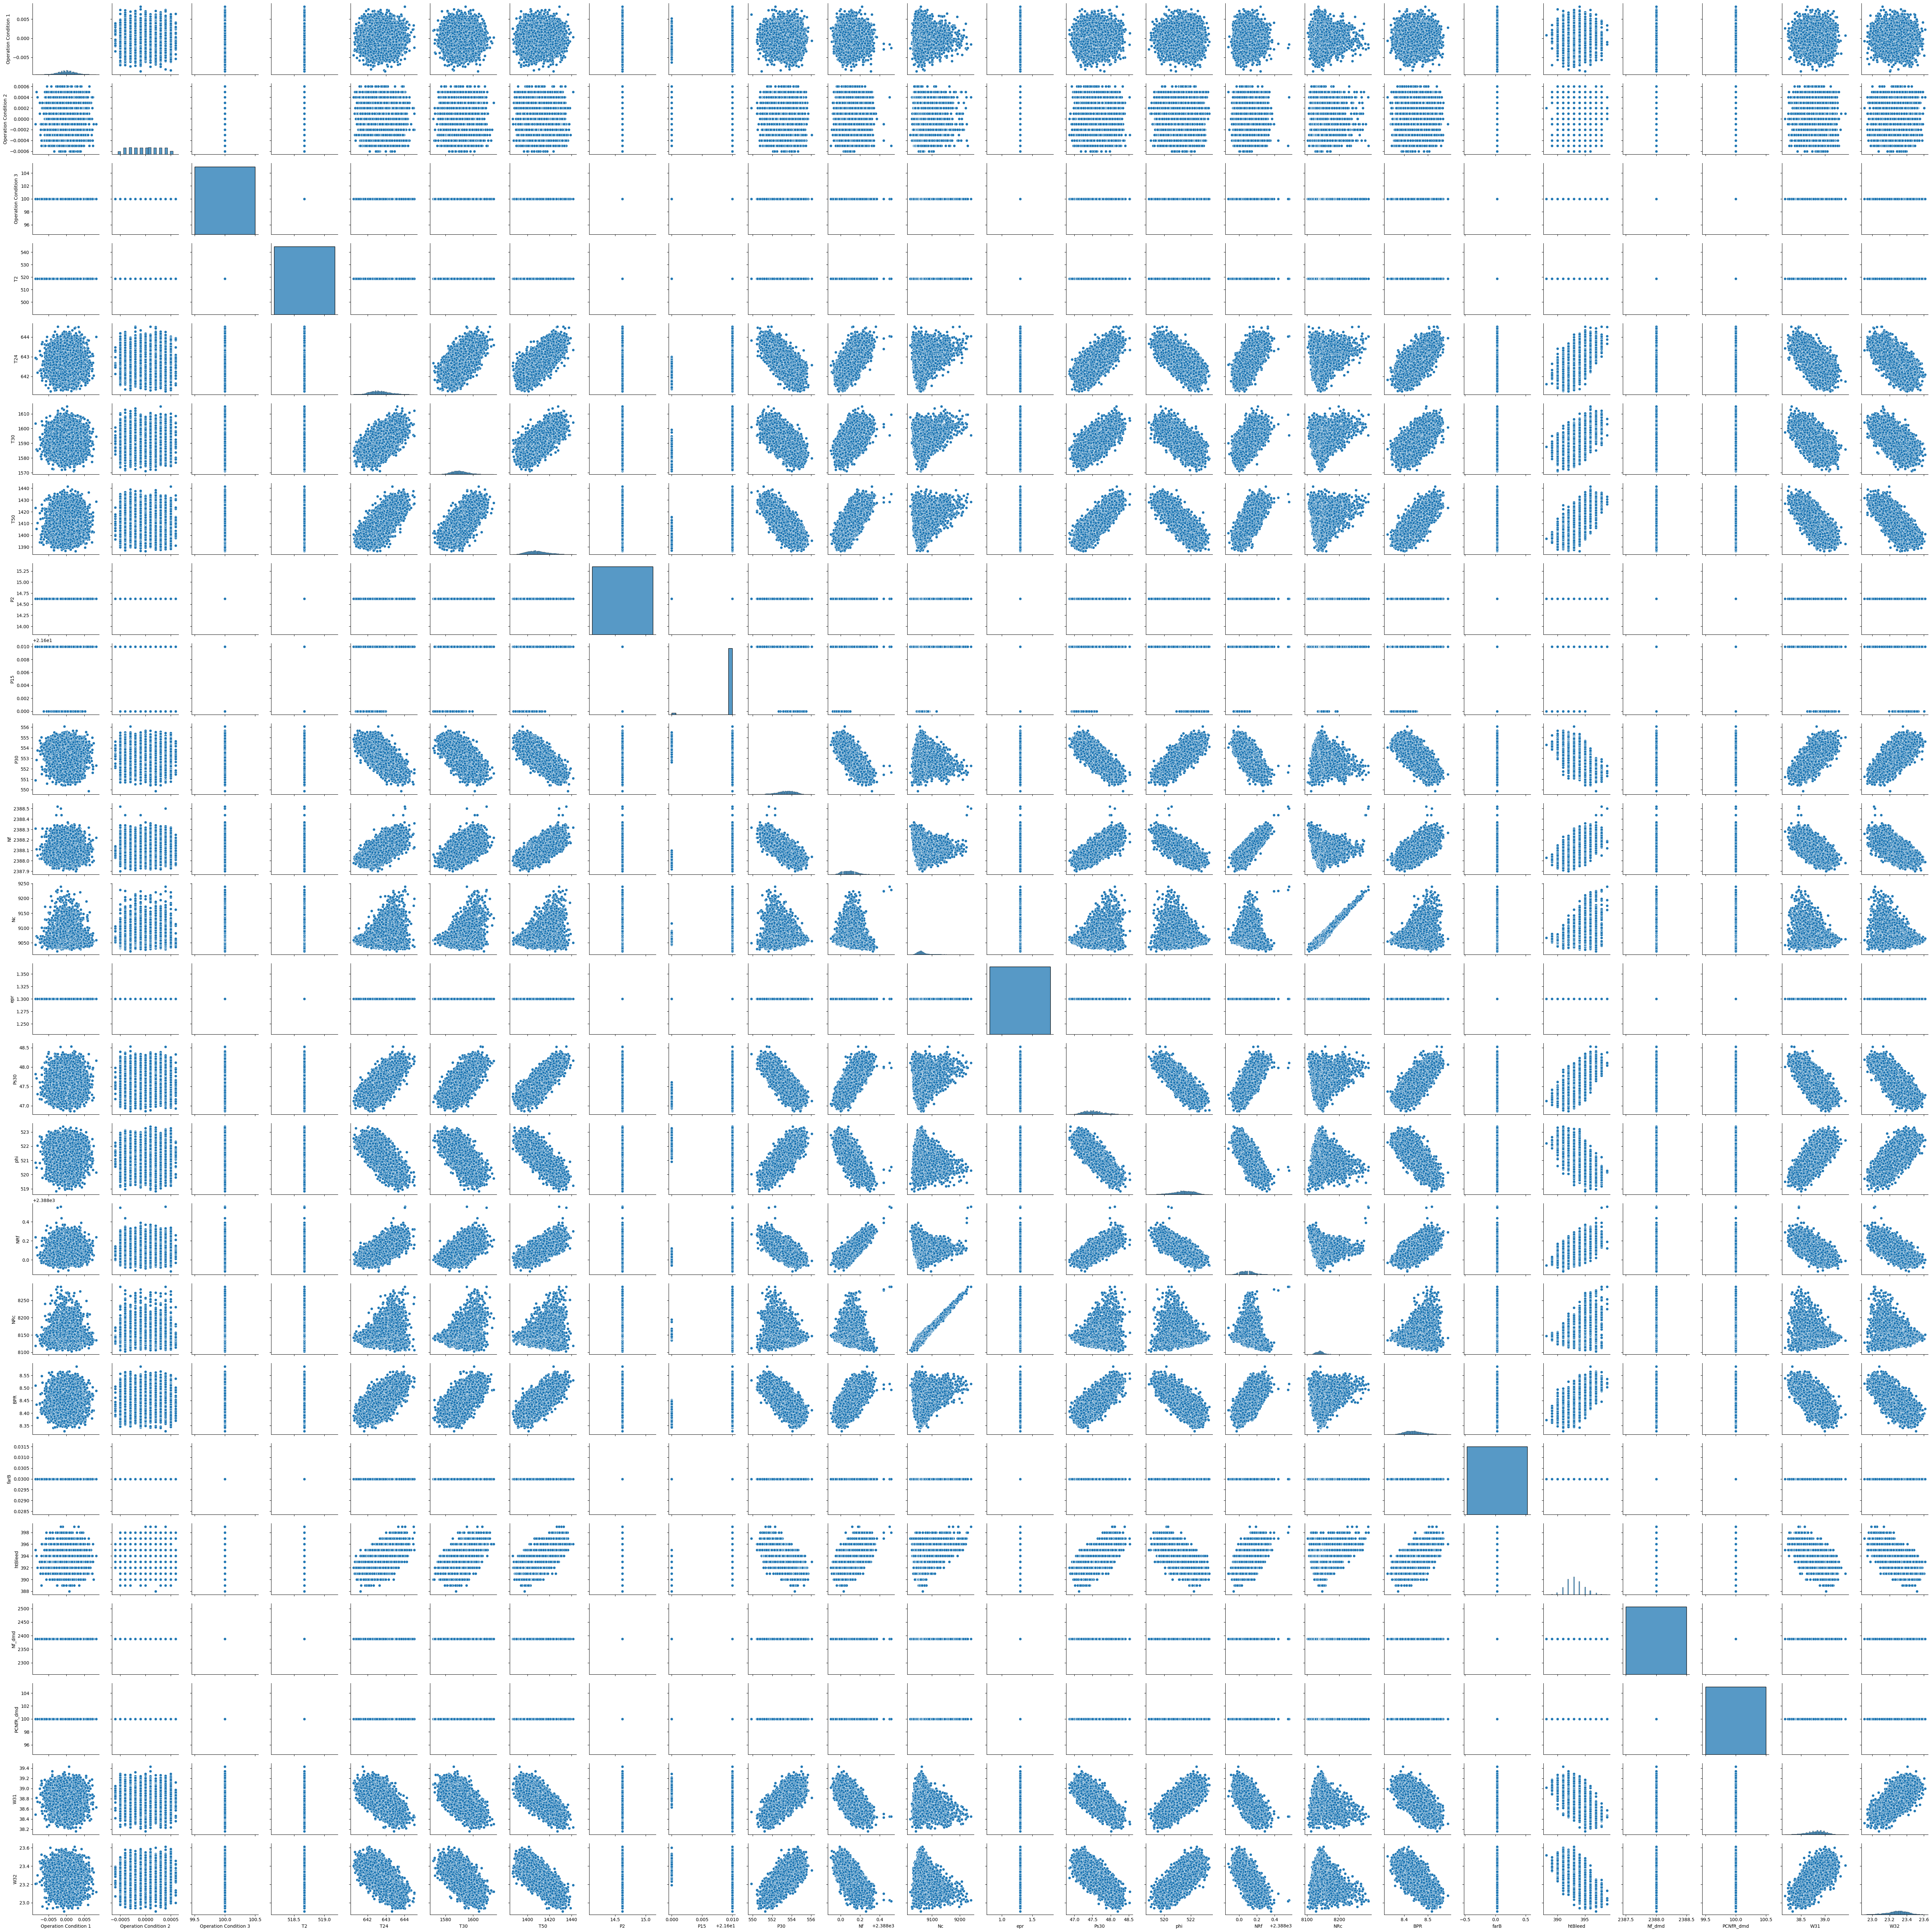

In [14]:
sns.pairplot(X_train)

## Logistic Regression

In [58]:
# SKlearn base model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [59]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)

In [62]:
metrics.mean_squared_error(y_test, y_pred)**0.5

74.3292298674713

In [61]:
metrics.mean_absolute_error(y_test, y_pred)

65.42291443685716

In [64]:
metrics.r2_score(y_test, y_pred)

-1.8227626197774813

In [65]:
metrics.mean_squared_log_error(y_test, y_pred)

1.7060115763591275

## Deep Neural Net: RNN Regressor

In [29]:
import tensorflow as tf
import keras
from keras import layers

In [34]:
model = tf.keras.Sequential([
    layers.SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)),
    layers.Dropout(0.2),
    layers.SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True),
    layers.SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True),
    layers.SimpleRNN(units = 50)
])
model.add(layers.Dense(units = 1,activation='sigmoid'))

In [ ]:
model.compile(optimizer = keras.optimizers.legacy.SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")